### Time Serie et Forecasting

##### Définitions :
- Time Serie : En général, une série chronologique est une séquence de points de données pris à intervalles de temps équidistants. La fréquence des points de données enregistrés peut être horaire, quotidienne, hebdomadaire, mensuelle, trimestrielle ou annuelle.
 
- Les statistiques permettent d'analyser les données de séries chronologiques. Ces méthodes nous permettent d'extraire des statistiques, des modèles et d'autres caractéristiques significatives des données afin de créer des prévisions significatives et précises. Les séries chronologiques sont visualisées à l'aide de graphiques linéaires (lineplot).
  
- Le forecasting est le processus d'utilisation d'un modèle statistique pour prédire les valeurs futures d'une série chronologique sur la base des résultats passés.

In [1]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.7/9.9 MB 20.2 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.9 MB 27.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.9 MB 27.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 29.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.7/9.9 MB 28.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 30.0 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 30.0 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 30.0 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 30.0 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 30.0 MB/s eta 0:00:01
   ----

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
df = pd.read_csv('AirPassengers.csv')

In [4]:
df = df.rename(columns={"Month": "Date", "#Passengers": "Passengers"}, errors="raise")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df = df.set_index('Date')
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


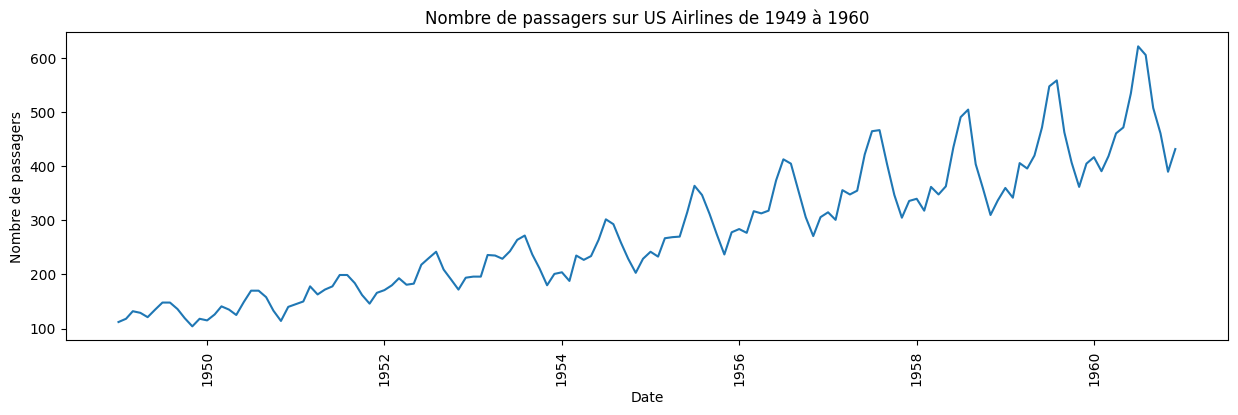

In [5]:
plt.figure(figsize=(15,4))
plt.plot(df['Passengers'])
plt.gca().set(title='Nombre de passagers sur US Airlines de 1949 à 1960', xlabel='Date', ylabel='Nombre de passagers')
plt.xticks(rotation=90)
plt.show()

##### Composante d'une série chronologique :
- Trend : Une tendance est observée lorsqu’une pente croissante ou décroissante est observée dans la série chronologique.
- Seasonality : Une saisonnalité est observée lorsqu'un pattern répété distinct est observé entre des intervalles réguliers en raison de facteurs saisonniers. Cela peut être dû au mois de l’année, au jour du mois, aux jours de la semaine ou même à l’heure de la journée.

Cependant, il n’est pas obligatoire que toutes les séries chronologiques aient une tendance et/ou une saisonnalité. Une série chronologique peut ne pas avoir de tendance distincte mais avoir une saisonnalité et vice versa.

- Cyclic behaviour : Une autre chose importante à considérer est le comportement cyclique. Cela se produit lorsque le pattern de hausse et de baisse de la série ne se produit pas à intervalles fixes basés sur un calendrier. Il ne faut pas confondre effet « cyclique » et effet « saisonnier ». Si les pattern ne sont pas des fréquences fixes basées sur un calendrier, alors ils sont cycliques. Car contrairement à la saisonnalité, les effets cycliques sont généralement influencés par des facteurs d'entreprise, de marché ou d’autres facteurs socio-économiques.

[Plus d'infos](https://medium.com/analytics-vidhya/time-series-forecasting-introduction-7193925354f1)

##### Décomposition d'une série chronologique :
Les composantes d'une série de données chronologiques pevent être extraire afin de mieux comprendre les modèles sous-jacents.
Il existe deux manières de décomposer la série chronologique :
  
- Multiplicatif : y(t) = T(t) * S(t) * R(t)  
- Additif : y(t) = T(t) + S(t) + R(t)
  
où y(t) est la série brute, T(t) est la composante tendance au temps t, S(t) est la composante saisonnière au temps t et R(t) est la composante résiduelle au temps t.

La décomposition additive est généralement utilisée lorsque la variation saisonnière est indépendante de la tendance, tandis que la composante multiplicative est utilisée lorsque la variation saisonnière est proportionnelle à la tendance.

[Plus d'info](https://medium.com/analytics-vidhya/time-series-decomposition-part-i-trend-cycle-computation-29fac227896a#:~:text=Additive%20decomposition%20is%20generally%20used,is%20proportional%20to%20the%20trend.)

In [6]:
multiplicative_decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=30)

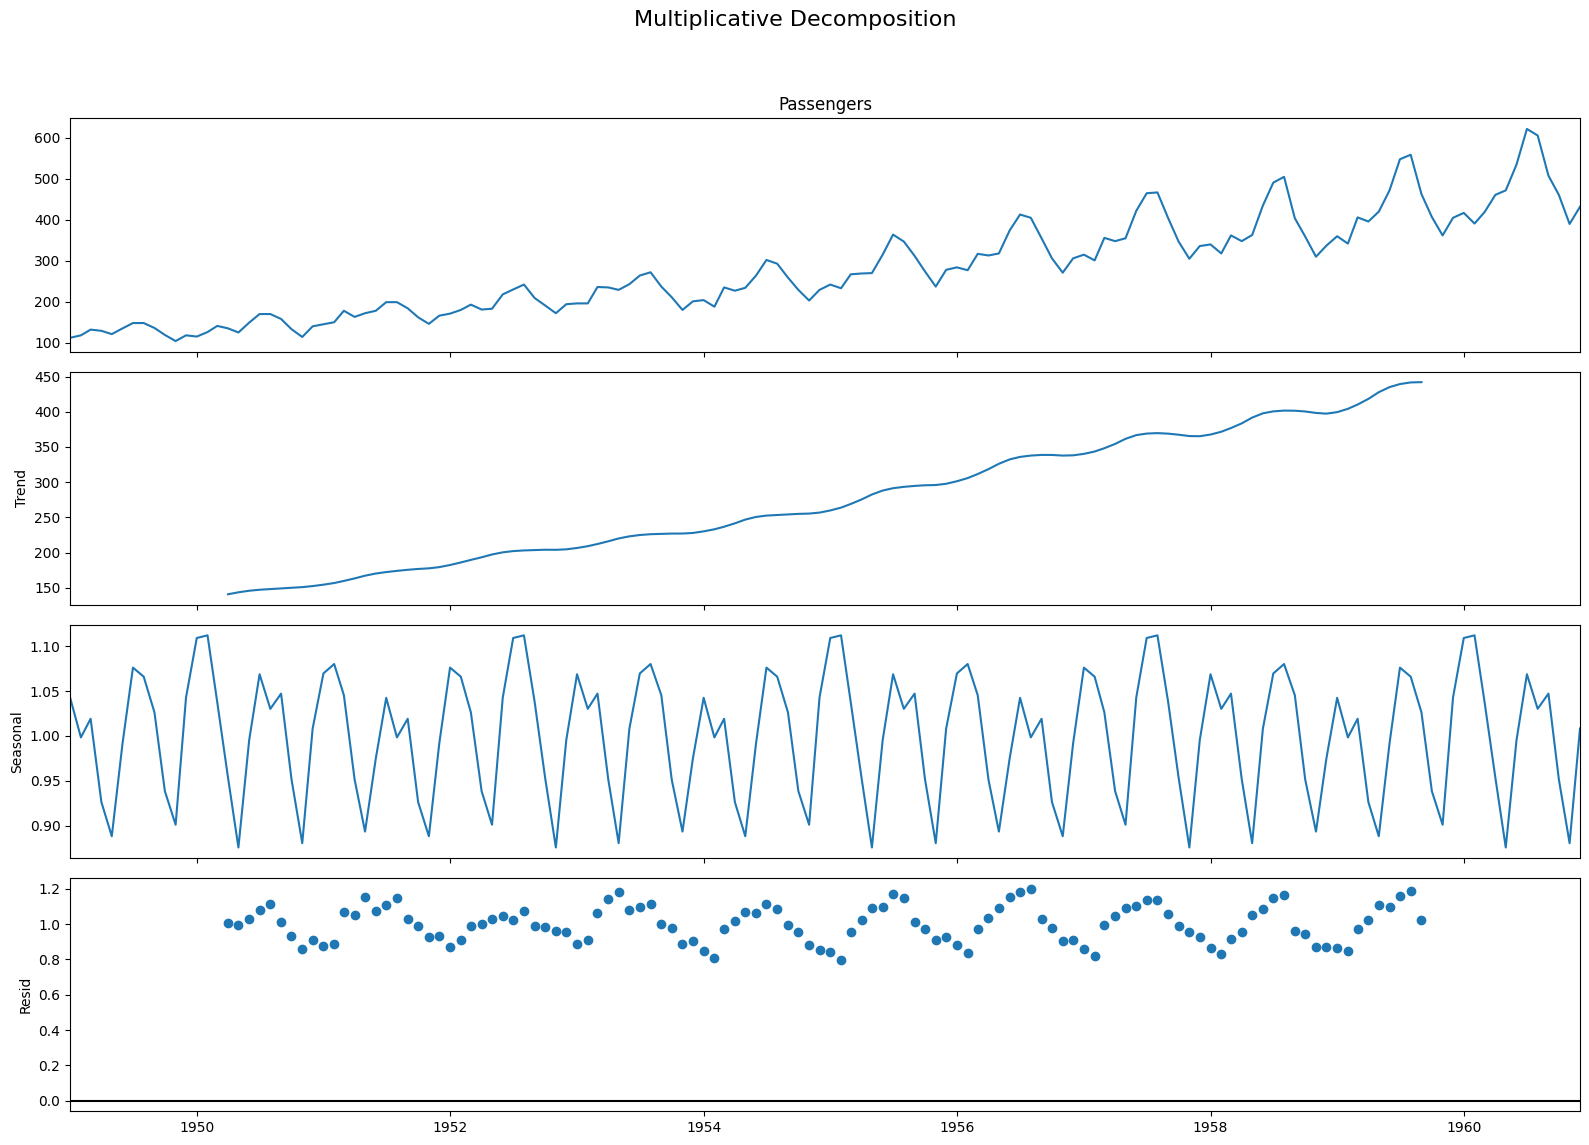

In [7]:
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
additive_decomposition = seasonal_decompose(df['Passengers'], model='additive', period=30)

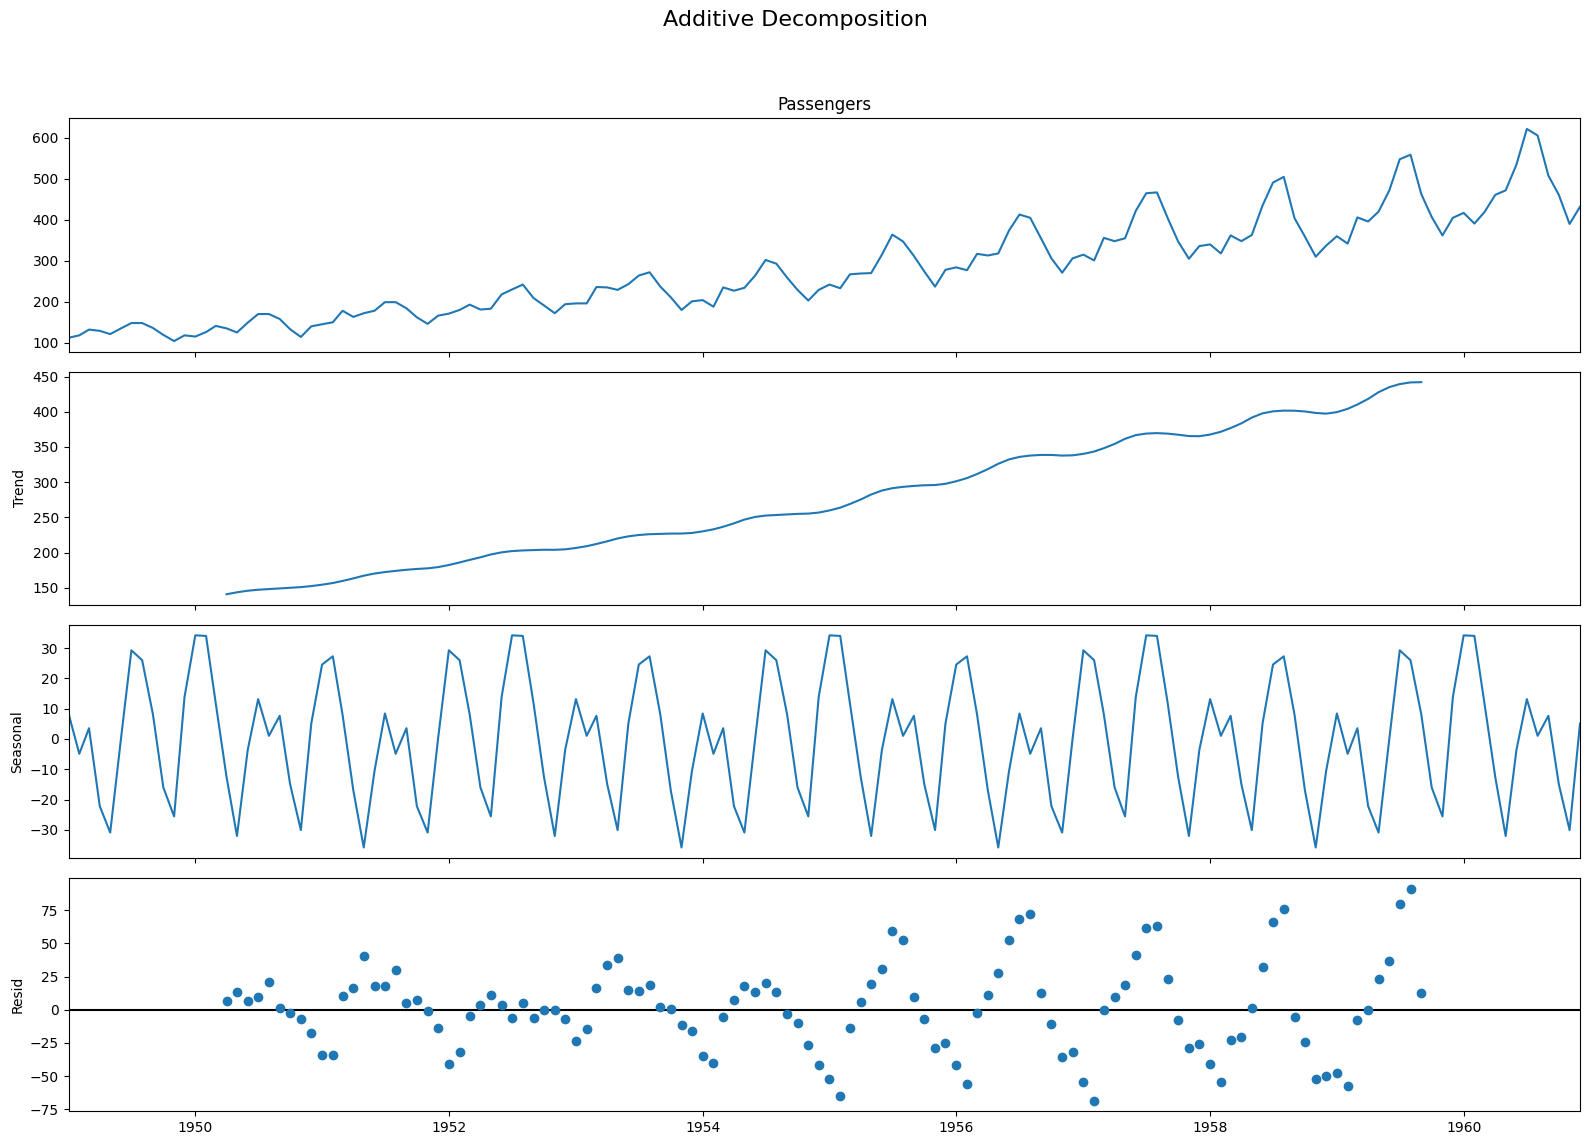

In [9]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Modèles statistiques pour la prévision de séries chronologiques :

Le modèle ARIMA (AutoRegressive Integrated Moving Average) est une méthode statistique qui a acquis une immense popularité en raison de son efficacité dans la gestion de diverses structures temporelles standard présentes dans les données de séries chronologiques.
- AR (Autorégression) : Cela met l'accent sur la relation de dépendance entre une observation et ses observations précédente.
- I (Intégré) : Pour obtenir une série chronologique stationnaire, qui ne présente ni tendance ni saisonnalité, une différenciation est appliquée. Cela implique généralement de soustraire une observation de son observation précédente.
- MA (Moving Average) : ce composant se concentre sur la relation entre une observation et l'erreur résiduelle d'un modèle de moyenne mobile basé sur des observations décalées.

Chacun de ces composants est explicitement spécifié dans le modèle en tant que paramètre. Une notation standard est utilisée pour ARIMA(p,d,q) où les paramètres sont des valeurs entières pour indiquer le modèle ARIMA spécifique utilisé. Les paramètres du modèle ARIMA sont définis comme suit :

- p : L'ordre du retard, représentant le nombre d'observations de retard incorporées dans le modèle.
- d : Degré de différenciation, indiquant le nombre de fois où les observations brutes subissent une différenciation.
- q : Ordre de moyenne mobile, indiquant la taille de la fenêtre de moyenne mobile.

Un modèle de régression linéaire est construit en incluant le nombre et le type de termes spécifiés, et les données sont préparées selon un certain degré de différenciation pour les rendre stationnaires, c'est-à-dire pour supprimer les tendances et les structures saisonnières qui affectent négativement le modèle de régression. N'importe lequel de ces paramètres peut être défini sur 0, ceci permettent au modèle ARIMA d'imiter les fonctions de modèles plus simples comme ARMA, AR, I ou MA.

[Plus d'infos](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

In [10]:
train_df = df.iloc[0:120]
X_train = train_df['Passengers']

test_df = df.iloc[120:144]
X_test = test_df['Passengers']

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


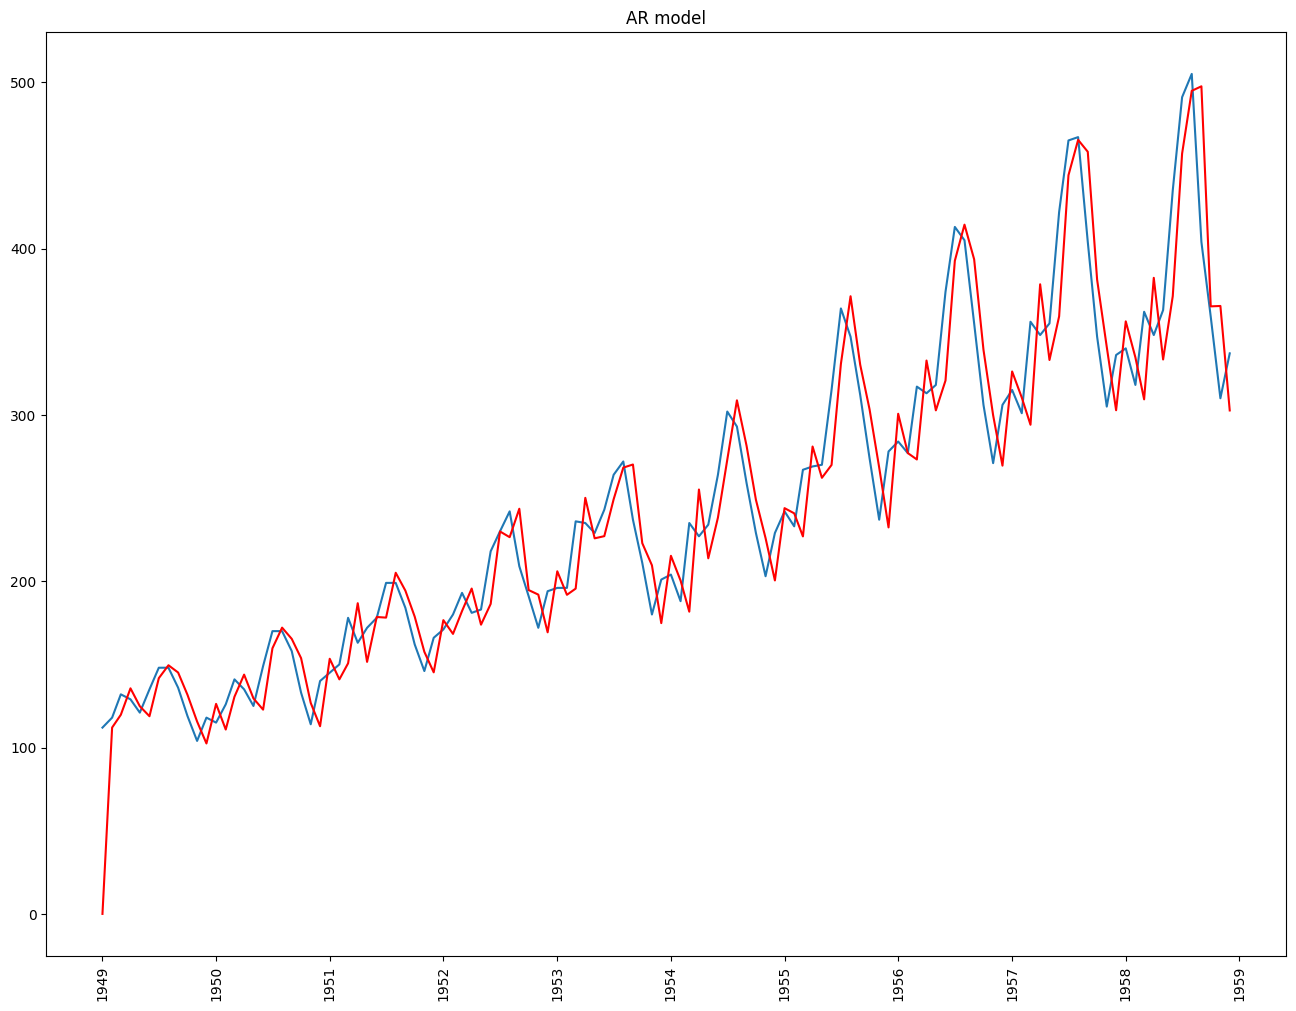

In [11]:
#AR MODEL
model_AR = ARIMA(X_train, order=(2, 1, 0))  
results_AR = model_AR.fit()  
plt.plot(train_df['Passengers'])
plt.plot(results_AR.fittedvalues, color='red')
plt.xticks(rotation=90)
plt.title('AR model')
print('Plotting AR model')

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting MA model


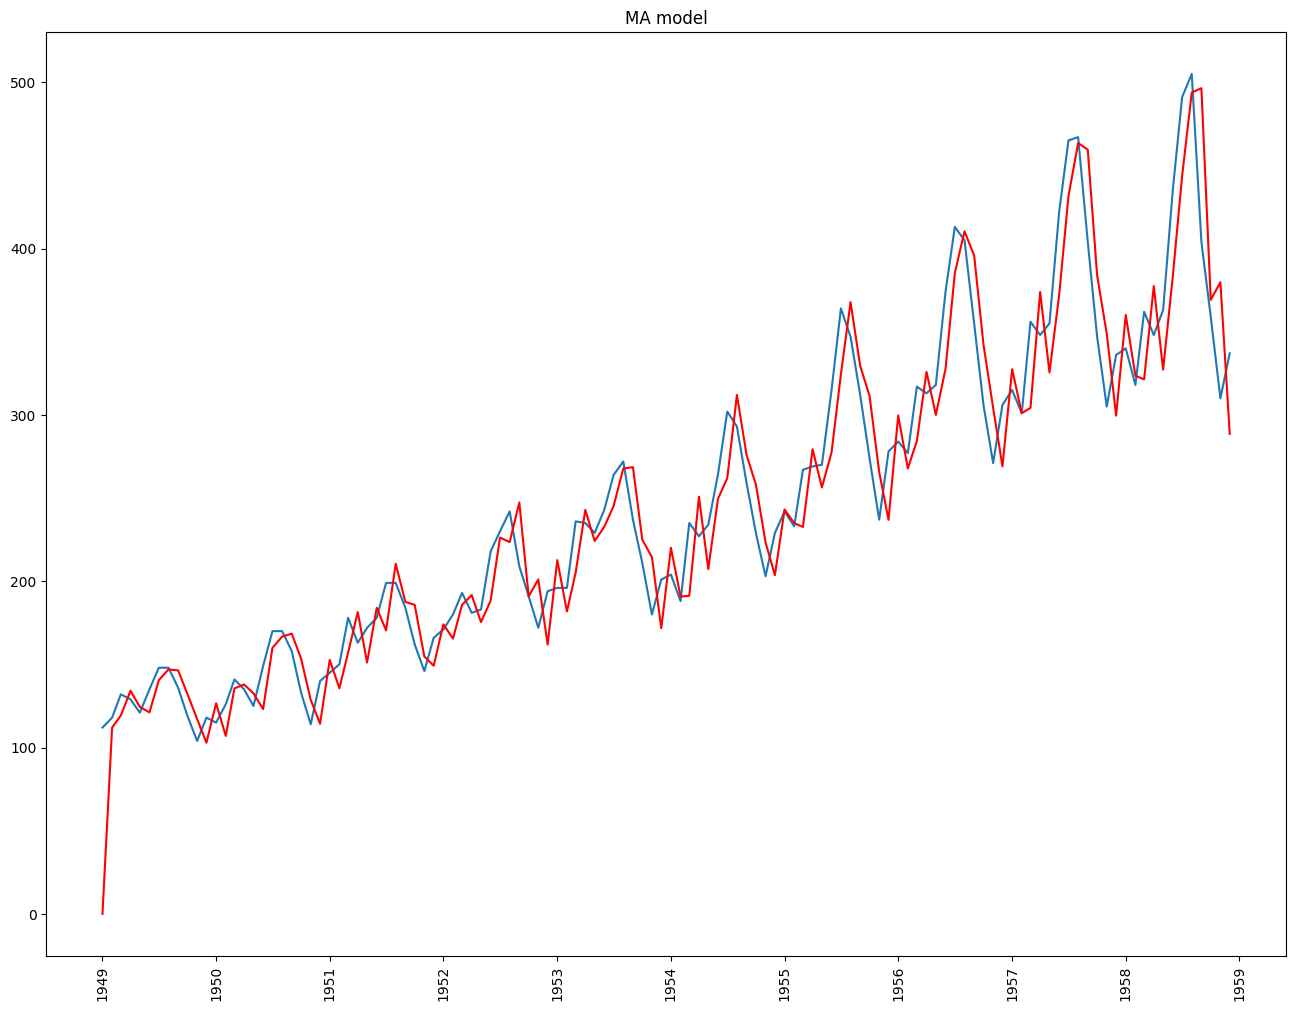

In [12]:
#MA MODEL
model_MA = ARIMA(X_train, order=(0, 1, 2))  
results_MA = model_MA.fit()  
plt.plot(train_df['Passengers'])
plt.plot(results_MA.fittedvalues, color='red')
plt.xticks(rotation=90)
plt.title('MA model')
print('Plotting MA model')

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting ARIMA model


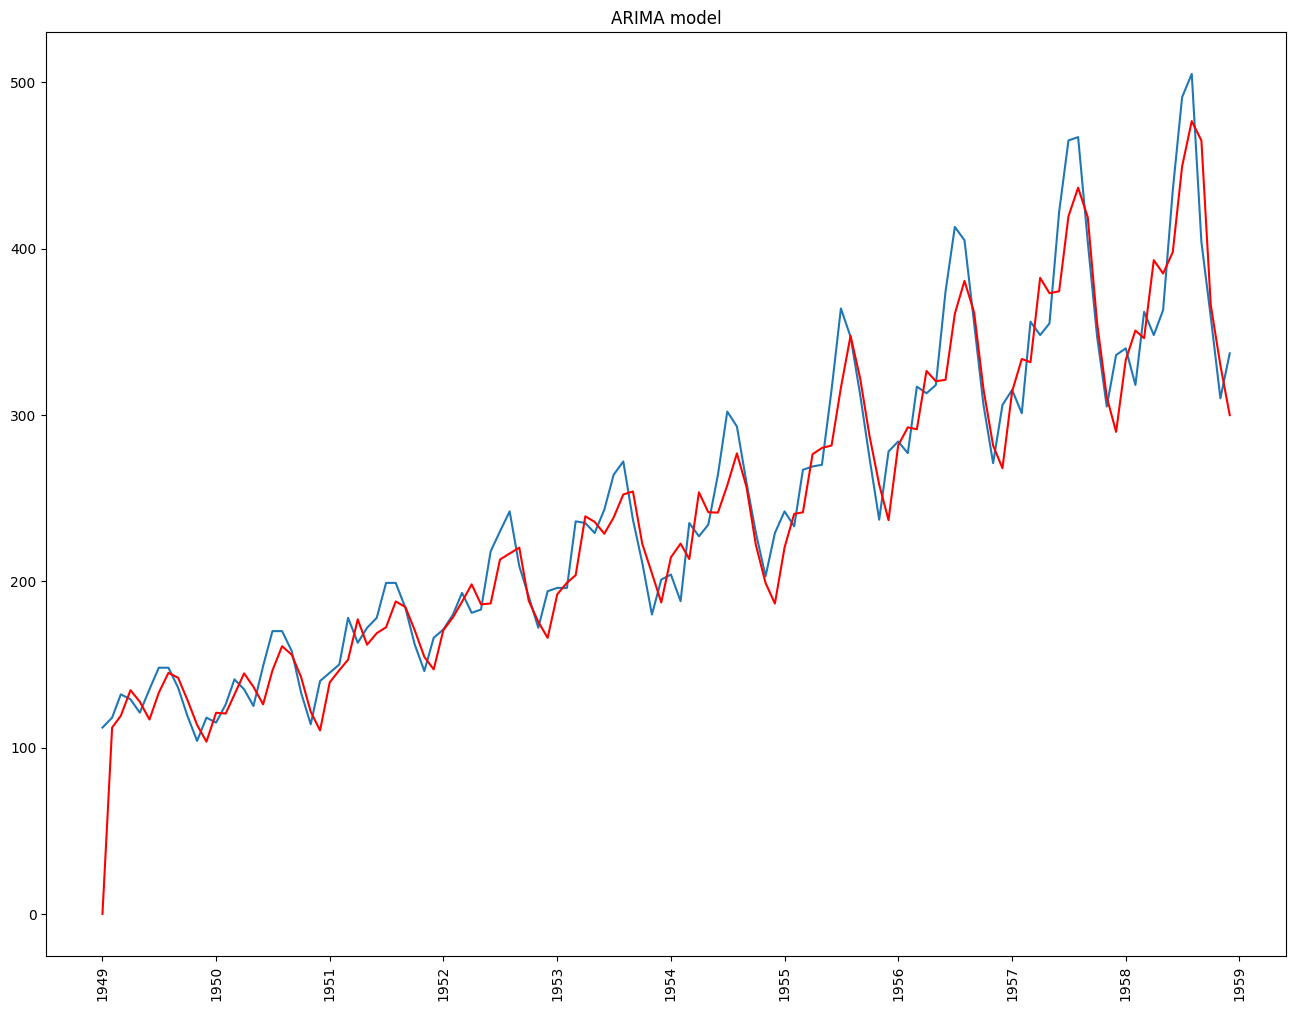

In [13]:
#ARIMA MODEL
model_ARIMA = ARIMA(X_train, order=(2, 1, 2))  
results_ARIMA = model_ARIMA.fit()  
plt.plot(train_df['Passengers'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.xticks(rotation=90)
plt.title('ARIMA model')
print('Plotting ARIMA model')

In [14]:
history = [x for x in X_train]
predictions = list()

# walk-forward validation
for t in range(len(X_test)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    obs = X_test.iloc[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=' + str(yhat) +', expected=' + str(obs))
    



predicted=336.9378691551929, expected=360
predicted=367.62148836404305, expected=342
predicted=360.2950344906098, expected=406
predicted=414.0837016029659, expected=396
predicted=378.5208777872744, expected=420


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=424.47970321932326, expected=472
predicted=459.477026836258, expected=548
predicted=534.2442000171211, expected=559


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=523.5125656449662, expected=463
predicted=417.6074755914433, expected=407


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=366.68281786313594, expected=362


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=339.2165581792838, expected=405
predicted=411.31245370003, expected=417
predicted=435.9379696819025, expected=391
predicted=418.796170689534, expected=419
predicted=451.31493642177327, expected=461
predicted=488.38490373141804, expected=472
predicted=488.5690781276711, expected=535
predicted=532.2190151362444, expected=622


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=601.2170564180942, expected=606


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=563.0287965300424, expected=508


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=452.917094789972, expected=461


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=415.0078880819571, expected=390
predicted=367.68490051719283, expected=432


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(X_test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 43.140


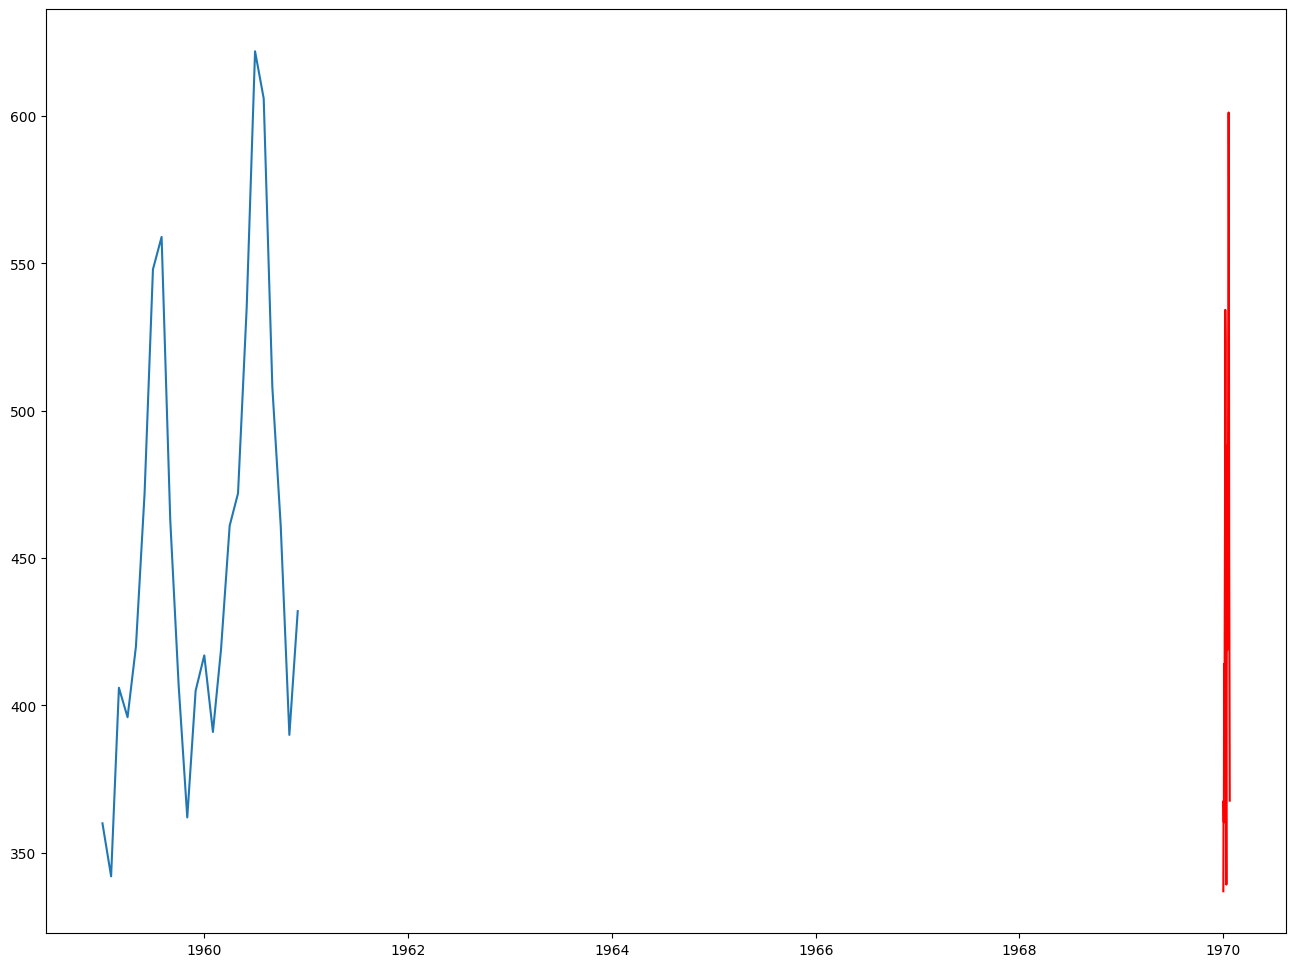

In [16]:
# plot forecasts against actual outcomes
plt.plot(X_test)
plt.plot(predictions, color='red')
plt.show()

### A vous de jouer

Préduire la température sur une semaine, un mois et une année et comparer les résultats.

In [17]:
df_temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df_temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [18]:
df_temp.tail(7)

,Date,Temp
3643,1990-12-25,12.9
3644,1990-12-26,14.6
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0
